<b>The code below used STLM by using only Capacity field to predict the RUL(STLM using one variable with multisteps)</b> 
<p>We built the model only on Battery B0005</p>

In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
df=pd.read_csv("B0005_on.csv")
#featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','NewCap']
f1=['cycle','NewCap']
df=df[f1]
#dataset=df[(df.Batt_name =='B0005')| (df.Batt_name =='B0006') | (df.Batt_name =='B0007')|(df.Batt_name =='B0018')]
# Feature Selection
#dataset=df[(df['Batt_name']=='B0006_11')]
dataset=df#<70 need window to be 10
#dataset=dataset[f1]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [5]:
ln=len(data_train)
ln

49

<h1> Applied STLM </h3>

In [3]:
regress=Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=25)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
39/39 [==============================] - 14s 355ms/step - loss: 0.3222
Epoch 2/200
39/39 [==============================] - 1s 32ms/step - loss: 0.1674
Epoch 3/200
39/39 [==============================] - 1s 25ms/step - loss: 0.1033
Epoch 4/200
39/39 [==============================] - 1s 36ms/step - loss: 0.0693
Epoch 5/200
39/39 [==============================] - 1s 31ms/step - loss: 0.0728
Epoch 6/200
39/39 [==============================] - 1s 31ms/step - loss: 0.1029
Epoch 7/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0848
Epoch 8/200
39/39 [==============================] - 1s 32ms/step - loss: 0.0515
Epoch 9/200
39/39 [==============================] - 1s 29ms/step - loss: 0.0519
Epoch 10/200
39/39 [==============

39/39 [==============================] - 1s 28ms/step - loss: 0.0336
Epoch 90/200
39/39 [==============================] - 1s 35ms/step - loss: 0.0386
Epoch 91/200
39/39 [==============================] - 2s 49ms/step - loss: 0.0355
Epoch 92/200
39/39 [==============================] - 2s 41ms/step - loss: 0.0379
Epoch 93/200
39/39 [==============================] - 1s 33ms/step - loss: 0.0334
Epoch 94/200
39/39 [==============================] - 1s 27ms/step - loss: 0.0375
Epoch 95/200
39/39 [==============================] - 1s 36ms/step - loss: 0.0437
Epoch 96/200
39/39 [==============================] - 2s 39ms/step - loss: 0.0369
Epoch 97/200
39/39 [==============================] - 1s 35ms/step - loss: 0.0408
Epoch 98/200
39/39 [==============================] - 2s 46ms/step - loss: 0.0392
Epoch 99/200
39/39 [==============================] - 2s 48ms/step - loss: 0.0354
Epoch 100/200
39/39 [==============================] - 1s 29ms/step - loss: 0.0412
Epoch 101/200
39/39 [=======

Epoch 188/200
39/39 [==============================] - 2s 54ms/step - loss: 0.0261
Epoch 189/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0225
Epoch 190/200
39/39 [==============================] - 1s 36ms/step - loss: 0.0273
Epoch 191/200
39/39 [==============================] - 1s 30ms/step - loss: 0.0236
Epoch 192/200
39/39 [==============================] - 1s 28ms/step - loss: 0.0269
Epoch 193/200
39/39 [==============================] - 1s 23ms/step - loss: 0.0304
Epoch 194/200
39/39 [==============================] - 1s 34ms/step - loss: 0.0260
Epoch 195/200
39/39 [==============================] - 2s 40ms/step - loss: 0.0257
Epoch 196/200
39/39 [==============================] - 1s 35ms/step - loss: 0.0269
Epoch 197/200
39/39 [==============================] - 1s 30ms/step - loss: 0.0236
Epoch 198/200
39/39 [==============================] - 1s 31ms/step - loss: 0.0209
Epoch 199/200
39/39 [==============================] - 2s 49ms/step - loss: 0.0265
Epoc

<h1> Test the Model that was built by STLM</h1>

In [6]:
len(data_test)

119

In [7]:
#### predictions
data_total=pd.concat((data_train['NewCap'],data_test['NewCap']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [8]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)

metrics.r2_score(tests,pred)

Test RMSE: 0.053


0.8474772260577518

In [9]:
len(pred)
data_test['pre']=pred
#print(data_test.head(50))

/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Discharge B0005 (prediction)start in cycle 50 -RULe=-8, window-size=10')

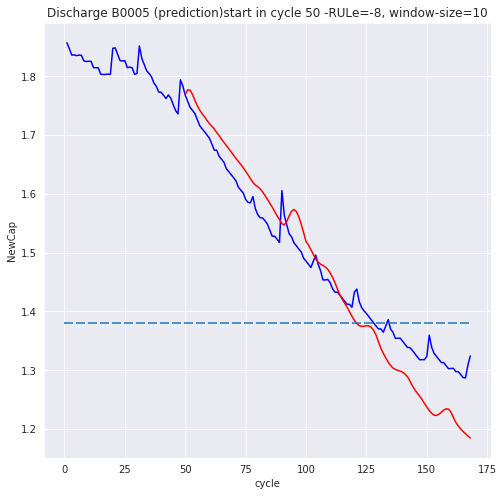

In [14]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','NewCap']]
plot_per=data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))
plt.plot(plot_df['cycle'], plot_df['NewCap'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#plt.plot(pred)
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2])
plt.ylabel('NewCap')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005 (prediction)start in cycle 50 -RULe=-8, window-size=10')

In [12]:
actual=0
pred=0
Afil=0
Pfil=0
a=data_test['NewCap'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
    
        

The Actual fail at cycle number: 128
The prediction fail at cycle number: 120


In [13]:
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The error of RUL= -8 Cycle(s)


<h4> The LSTM model with(one input layer, 3 hidden layer and 1 output layer, and each layer with 200 neurons) the 
    results below show the prediction in different number of cycles.</h4>
 <h4> when the training dataset less than 70 cycles, we need to adjust the window(lage) to 10 rather than 5.</h4> 

<tabel>
    <tr>
        <td><img src="Cycle110-w5.png"></td>
        <td><img src="Cycle100-w5.png"></td>
  </tr>
     <tr>
        <td><img src="Cycle80-w5.png"></td>
  </tr>
</tabel>